In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [50]:
#!pip install pycairo
#!pip install cairocffi

In [1]:
import numpy as np
from igraph import *
import time
import matplotlib.pyplot
import timeit

In [2]:
def dec2bin(n):#Decimal para binário
    b = ''
    while n != 0:
        b = b + str(n % 2)
        n = int(n / 2)
    return b[::-1]

In [3]:
def dec2bin3(bits, n):#Decimal para binário
    b = []
    i=0
    while n != 0:
        b.insert(0,n % 2)
        n = int(n / 2)
        i=i+1
    i=0
    while len(b)<bits:
        b.insert(0,0)
    return b

In [4]:
def Faztudo(N_bits,N_vertices):
    g = Graph()
    #adiciona os vértices
    g.add_vertices(N_vertices+1)
    #Colocando os valores binários na matriz
    g.vs[0]["name"] ="V"+str(0)
    i=1
    a=np.zeros((N_bits,), dtype=int)
    matriz=np.array([a])#Primeira linha da matriz é de 0
    while i <=(N_vertices):
        matriz=np.append(matriz,[dec2bin3(N_bits,i)],axis=0)
        j=0
        g.vs[i]["name"] ="V"+str(i)#nomeando os vértices
        i=i+1
    k=0
    y=1
    z=0
    cont=0
    z=0
    while k<N_vertices:
        while y<N_vertices+1:
            while z<N_bits:
                if matriz[k][z]!=matriz[y][z]:
                    cont=cont+1
                z=z+1
            if cont==1:
                g.add_edges([(k, y)])#acrescenta uma aresta
            z=0
            cont=0
            y=y+1
        k=k+1
        y=k+1
    return g

Definição das entradas

In [20]:
n=3 #Valor de n
N_vertices=(2**n)-1 #Número de vértices considerando 0
maior_V=dec2bin(N_vertices)
N_bits=9#len(maior_V)#Quantidade de colunas de bits
print("Valor de n:",n)
print("Número de vértices:", N_vertices+1)
print("Qtd de colunas no binário", len(maior_V))

Valor de n: 3
Número de vértices: 8
Qtd de colunas no binário 3


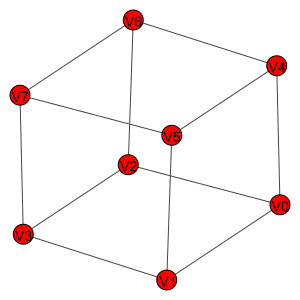

In [117]:
g=Faztudo(N_bits,N_vertices)

g.vs["label"] = g.vs["name"]
ini=time.time()
layout = g.layout("kk")
fim=time.time()
#layout = g.layout_kamada_kawai()
#layout = g.layout("circle")
#plot(g, layout = layout)
plot(g, layout = layout, bbox = (300, 300), margin = 20)
#print("Tempo de execução:",fim-ini)

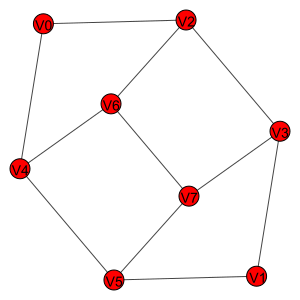

In [92]:
p=1
population = [0, 1]
weights = [p, 1-p]

samples = choices(population, weights, k=1)

if samples[0]==0:
    try:
        g.delete_edges([(0,1)])#deleta aresta
    except:
        z=0
#g.delete_edges([(0,1)])
layout = g.layout("kk")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

In [105]:
probabilidades=[0,1,0.5]
for p in probabilidades:
    print(p)

0
1
0.5


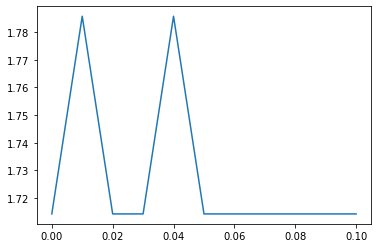

In [160]:
#Dinâmico
from random import choices
import matplotlib.pyplot as plt
from pylab import plot, show

probabilidades=[]

population = [0, 1]
weights = [p, 1-p]
caminho_medio=[]

p=0
k=0
y=1
z=0
cont=0
z=0
while p <=0.1:
    g=Faztudo(N_bits,N_vertices)
    weights = [p, 1-p]
    while k<N_vertices:
        while y<=N_vertices:
            samples = choices(population, weights, k=1)
            if samples[0]==0:
                try:
                    g.delete_edges([(k,y)])#deleta aresta
                    y=y+1
                except:
                    y=y+1
            else:
                y=y+1
        k=k+1
        y=k+1
    k=0
    y=1
    #print('\nCaminho médio(girth) para p=',round(p,2))
    #print(g.average_path_length())
    probabilidades.append(round(p,2))
    caminho_medio.append(g.average_path_length())
    p=p+0.01

matplotlib.pyplot.plot( probabilidades, caminho_medio) 
matplotlib.pyplot.show()
    

In [ ]:
matriz=np.array()

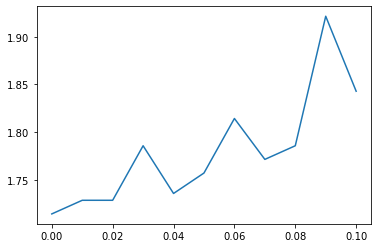

In [243]:
#Dinâmico
from random import choices
import matplotlib.pyplot as plt
from pylab import plot, show
import numpy as np

probabilidades=[]

population = [0, 1]
weights = [p, 1-p]
caminho=[]
caminho_matriz[0]=[0,0,0,0,0,0,0,0,0,0,0]

p=0
k=0
y=1
z=0
cont=0
z=0
iteracao=1

primeira=np.zeros((11,), dtype=int)
matriz_aux=np.array([primeira])#Primeira linha da matriz é de 0

while iteracao<=10:
    probabilidades=[]
    while p <=0.1:
        g=Faztudo(N_bits,N_vertices)
        weights = [p, 1-p]
        while k<N_vertices:
            while y<=N_vertices:
                samples = choices(population, weights, k=1)
                if samples[0]==0:
                    try:
                        g.delete_edges([(k,y)])#deleta aresta
                        y=y+1
                    except:
                        y=y+1
                else:
                    y=y+1
            k=k+1
            y=k+1
        k=0
        y=1
        #print('\nCaminho médio(girth) para p=',round(p,2))
        #print(g.average_path_length())
        probabilidades.append(round(p,2))
        caminho.append(g.average_path_length())
        p=p+0.01
    matriz_aux=np.append(matriz_aux,[caminho],axis=0)
    iteracao=iteracao+1
    p=0
    caminho=[]
#print(caminho_matriz)
matriz_aux=np.delete(matriz_aux, 0, axis=0)
#print(matriz_aux)
media = np.average(matriz_aux, axis=0)
media
#test=np.array(media)
#test
#matplotlib.pyplot.plot( probabilidades, caminho_medio) 
#matplotlib.pyplot.show()
matplotlib.pyplot.plot(probabilidades, media) 
matplotlib.pyplot.show()

In [215]:
teste=[1,2,3]
teste3=[3,2,1]
#teste1=np.array(teste)
#teste2=np.empty(3,dtype=int)
#teste2=np.append(teste2,[teste],axis=0)
#teste2=np.append(teste2,[teste3],axis=0)

a=np.zeros((3,), dtype=int)
teste2=np.array([a])#Primeira linha da matriz é de 0
teste2=np.append(teste2,[teste],axis=0)
teste2=np.append(teste2,[teste3],axis=0)
teste2=np.delete(teste2, 0, axis=0)
teste2



array([[1, 2, 3],
       [3, 2, 1]])

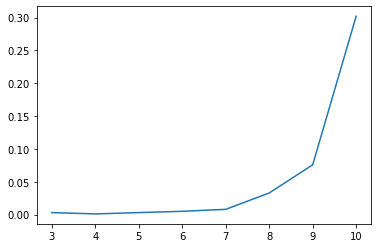

Tempo de execução: [0.003027677536010742, 0.0009930133819580078, 0.0029931068420410156, 0.0049817562103271484, 0.00794529914855957, 0.03287315368652344, 0.07576322555541992, 0.30215001106262207]


In [14]:
valores_n=[3,4,5,6,7,8,9,10]
tempo=[]
j=0
for i in valores_n:
    N_vertices=(2**i)-1 #Número de vértices considerando 0
    N_bits=10#len(maior_V)#Quantidade de colunas de bits
    g=Faztudo(N_bits,N_vertices)
    ini=time.time()
    layout = g.layout("kk")
    fim=time.time()
    tempo.append(fim-ini)

matplotlib.pyplot.plot(valores_n, tempo) 
matplotlib.pyplot.show()
print('Tempo de execução:', tempo)



In [118]:
#g.get_adjacency()
print('Matriz adjacente:') 
print(g.get_adjacency())
#g.get_adjacency_sparse()
#print(g.get_adjacency_sparse())
print("")
print("Sequencia de Graus:")
print(g.vs.degree())

print("")
print("Histograma de Graus:")
print(g.degree_distribution())

print("")
print("Diametro:")
print(g.diameter())

print('\nCinturão(girth):')
print(g.girth())

print('\nCaminho médio(girth):')
print(g.average_path_length())

Matriz adjacente:
[[0, 1, 1, 0, 1, 0, 0, 0]
 [1, 0, 0, 1, 0, 1, 0, 0]
 [1, 0, 0, 1, 0, 0, 1, 0]
 [0, 1, 1, 0, 0, 0, 0, 1]
 [1, 0, 0, 0, 0, 1, 1, 0]
 [0, 1, 0, 0, 1, 0, 0, 1]
 [0, 0, 1, 0, 1, 0, 0, 1]
 [0, 0, 0, 1, 0, 1, 1, 0]]

Sequencia de Graus:
[3, 3, 3, 3, 3, 3, 3, 3]

Histograma de Graus:
N = 8, mean +- sd: 3.0000 +- 0.0000
[3, 4): ******** (8)

Diametro:
3

Cinturão(girth):
4

Caminho médio(girth):
1.7142857142857142


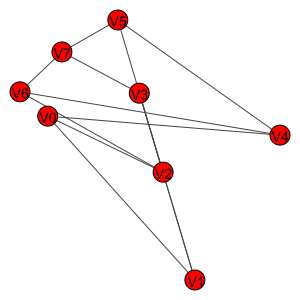

In [11]:
#igraph_layout_random
g.vs["label"] = g.vs["name"]
layout = g.layout("random")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

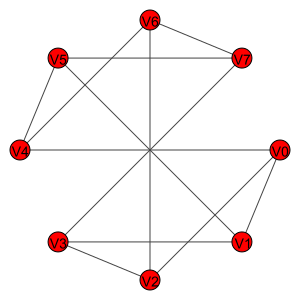

In [13]:
#igraph_layout_circle
g.vs["label"] = g.vs["name"]
layout = g.layout("circle")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

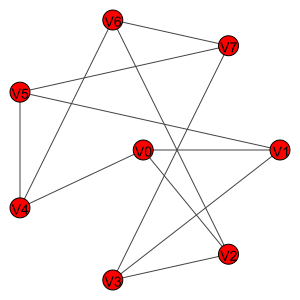

In [12]:
#igraph_layout_star
g.vs["label"] = g.vs["name"]
layout = g.layout("star")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

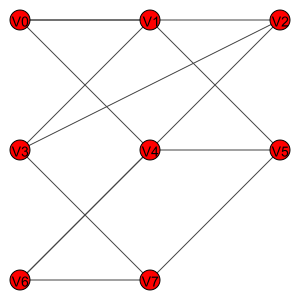

In [14]:
#igraph_layout_grid
g.vs["label"] = g.vs["name"]
layout = g.layout("grid")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

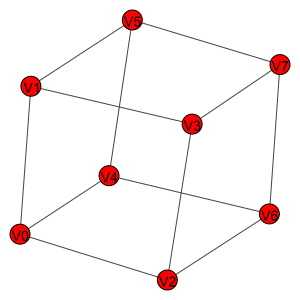

In [54]:
#igraph_layout_graphopt
g.vs["label"] = g.vs["name"]
layout = g.layout("graphopt")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

In [55]:
#igraph_layout_bipartite
#igraph_layout_gem
g.vs["label"] = g.vs["name"]
layout = g.layout("gem")
plot(g, layout = layout, bbox = (300, 300), margin = 20)


KeyError: 'gem'

In [58]:
#layout = g.layout_kamada_kawai()
layout=igraph_layout_bipartite(g)

NameError: name 'igraph_layout_bipartite' is not defined

In [9]:
Graph.Barabasi()
g.vs["label"] = g.vs["name"]
layout = g.layout("Barabasi")
plot(g, layout = layout, bbox = (300, 300), margin = 20)

TypeError: Required argument 'n' (pos 1) not found

Modelo de GNL

Modelos GNP
sample_gnp(n, p, directed = FALSE, loops = FALSE)
https://rdrr.io/cran/igraph/man/sample_gnp.html

Modelo Erdius_renyi
Erdos_Renyi(N,p)

modelo Small Word
Watts_Strogatz(dim, size, nei, p, loops=False, multiple=False)
dim qtd de vertices
nei passos de distancia (neighborad)
p probabilidade

Barabasi-Alberti
A probabilidade de ser sorteado é do vertice com maior grau
Barabasi(n, m, outpref=False, directed=False, power=1, zero_appeal=1, implementation="psumtree", start_from=None)

Teoria subjacente dos gráficos
Teoria dinâmica
rdrr.io
sample_gnp: Generate random graphs according to the G(n,p) Erdos-Renyi... in igr...
This model is very simple, every possible edge is created with the same
constant probability.




Barabasi(n, m, outpref=False, directed=False, power=1, zero_appeal=1, implementation="psumtree", start_from=None)
Watts_Strogatz(dim, size, nei, p, loops=False, multiple=False)